<a href="https://colab.research.google.com/github/Jonathan-code-hub/MAT-422-Math-Methods-in-Data-Science/blob/main/Homework_3_5%2C3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.5 K-Means

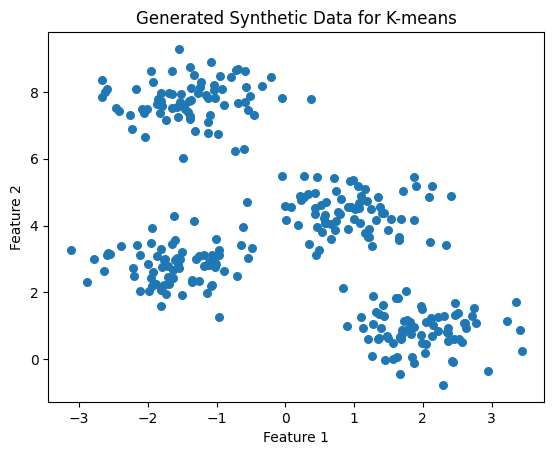

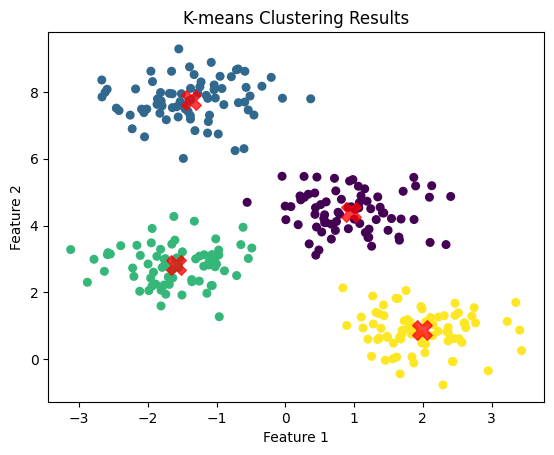

In [ ]:
# Demonstrating K-means Clustering #

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


# K-means clustering is a method to partition n samples into k clusters in which each sample belongs to the cluster with the nearest mean. #
# The algorithm iteratively refines the positions of the centroids and the clusters until convergence. #

# Generate synthetic data for clustering #
# make_blobs is a convenient function to create a dataset with known cluster centers #
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualize the synthetic dataset #
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Generated Synthetic Data for K-means")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Initialize the K-means model #
kmeans = KMeans(n_clusters=4)

# Fit the model to the data #
kmeans.fit(X)

# Predict the cluster labels #
y_kmeans = kmeans.predict(X)

# Plot the results #
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
centers = kmeans.cluster_centers_  # Get the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')  # Mark the centers #
plt.title("K-means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

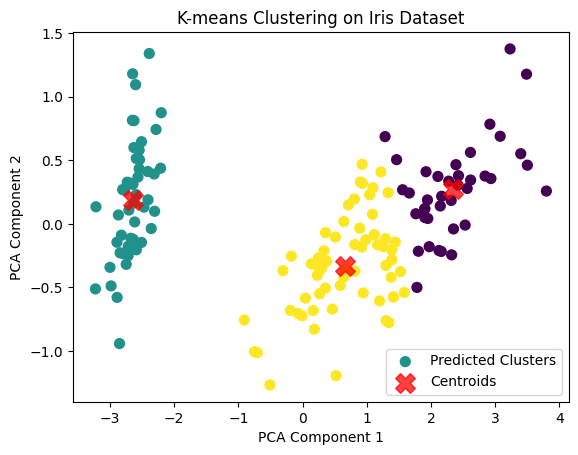

In [ ]:
# Demonstrating K-means Clustering with the Iris Dataset #


import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Load the Iris dataset #
iris = datasets.load_iris()
X = iris.data  # Features #
y = iris.target  # True labels (for reference) #

# Initialize the K-means model #
# We'll set k=3 since we know there are 3 species in the dataset #
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data #
kmeans.fit(X)

# Predict the cluster labels #
y_kmeans = kmeans.predict(X)

# Reduce dimensions for visualization (from 4D to 2D) using PCA #
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot the K-means clustering results #
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Predicted Clusters')
centers = kmeans.cluster_centers_
centers_reduced = pca.transform(centers)  # Transform centers to 2D space for plotting #

plt.scatter(centers_reduced[:, 0], centers_reduced[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-means Clustering on Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

3.6 Support Vector Machines

Accuracy of the SVM model on the Iris dataset: 0.8

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



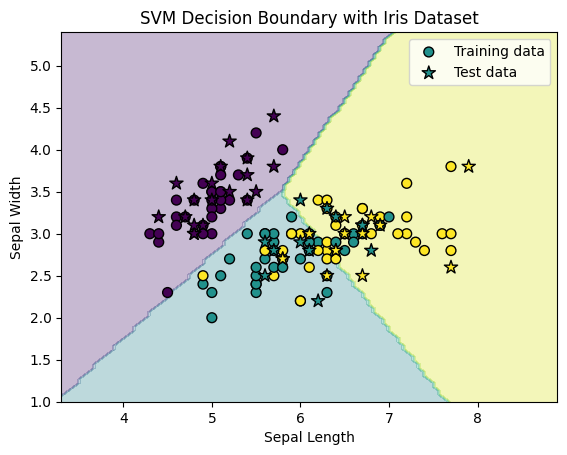

In [ ]:
# Demonstrating Support Vector Machines (SVM) #

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset #
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization (sepal length and sepal width) #
y = iris.target  # True labels #

# Split the dataset into training and testing sets #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Support Vector Classifier #
svm_model = SVC(kernel='linear')  # Using a linear kernel #

# Fit the model to the training data #
svm_model.fit(X_train, y_train)

# Predict the labels for the test set #
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model #
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the SVM model on the Iris dataset:", accuracy)

# Print detailed classification report #
print("\nClassification report:")
print(classification_report(y_test, y_pred))

# Plotting the decision boundary #
# Create a mesh grid for plotting #
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict the labels for each point in the mesh grid #
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins #
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', s=50, label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='*', s=100, label='Test data')
plt.title("SVM Decision Boundary with Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

Accuracy of the SVM model on the synthetic dataset: 0.9666666666666667

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



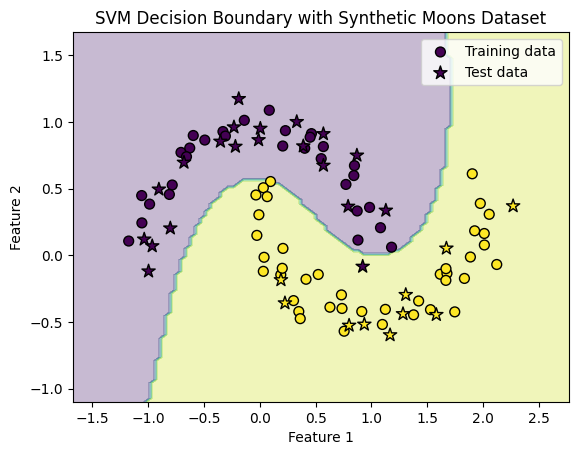

In [ ]:
# Demonstrating Support Vector Machines (SVM) with a Synthetic Dataset #

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create a synthetic dataset with two interleaving half circles (moons) #
X, y = datasets.make_moons(n_samples=100, noise=0.1, random_state=42)

# Split the dataset into training and testing sets #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Support Vector Classifier with a radial basis function (RBF) kernel #
svm_model = SVC(kernel='rbf', gamma='scale')  # RBF kernel is good for non-linear data #

# Fit the model to the training data #
svm_model.fit(X_train, y_train)

# Predict the labels for the test set #
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model #
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the SVM model on the synthetic dataset:", accuracy)

# Print detailed classification report #
print("\nClassification report:")
print(classification_report(y_test, y_pred))

# Plotting the decision boundary #
# Create a mesh grid for plotting #
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict the labels for each point in the mesh grid #
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins #
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', s=50, label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='*', s=100, label='Test data')
plt.title("SVM Decision Boundary with Synthetic Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
